This is a Sports Analytics Project I am going to perform using IPL data that i got from Kaggle

Data Source:https://www.kaggle.com/datasets/patrickb1912/ipl-complete-dataset-20082020

In this Project I have performed basic EDA on the data and tried to answer a few quesions with the help of ths data and reach to some conclusions

The 5 Questions I am answering in this project are


1.   Who are the Top 10 Run Scorers
2.   Who are the Top Wicket-Taking Bowlers
3.   Who are the most Economic Bowlers
4.   Who are the Top 10 batsman with Highest Strike Rates
5.   Who are the Top 10 Six Hitters

I will also be Visualizing my findings with help of various charts









In [1]:
# Importing the required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
#Loading the dataset
df = pd.read_csv('/content/deliveries.csv')


In [3]:
#Checking for missing values and Handling them
df.isnull().sum()

# There are missing values in 4 columns so we will replace the data points
df['extras_type'] = df['extras_type'].fillna('None')
df['player_dismissed'] = df['player_dismissed'].fillna('Not Out')
df['dismissal_kind'] = df['dismissal_kind'].fillna('None')
df['fielder'] = df['fielder'].fillna('None')
#There will be no missing values now in the dataset
df.isnull().sum()

,0
match_id,0
inning,0
batting_team,0
bowling_team,0
over,0
ball,0
batter,0
bowler,0
non_striker,0
batsman_runs,0


<ipython-input-4-0f9633f84823>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_runs',y='batter',data=top_run_scorers,palette='Blues_r')


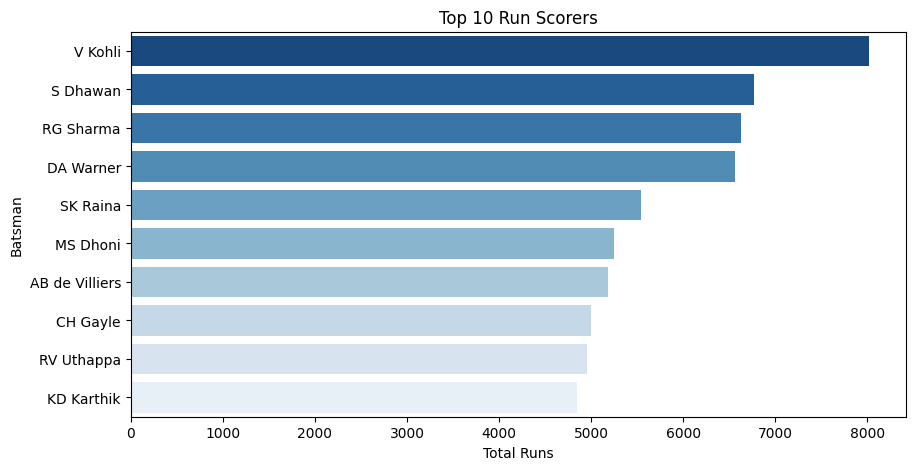

In [4]:
# EDA on Clean Data

# Who are the Top 10 Run Scorers
top_run_scorers =df.groupby('batter')['batsman_runs'].sum().sort_values(ascending=False).head(10)
top_run_scorers = top_run_scorers.reset_index()
top_run_scorers.columns =['batter','total_runs']

# plot for Top run scorers
plt.figure(figsize=(10,5))
sns.barplot(x='total_runs',y='batter',data=top_run_scorers,palette='Blues_r')
plt.xlabel('Total Runs')
plt.ylabel('Batsman')
plt.title('Top 10 Run Scorers')
plt.show()


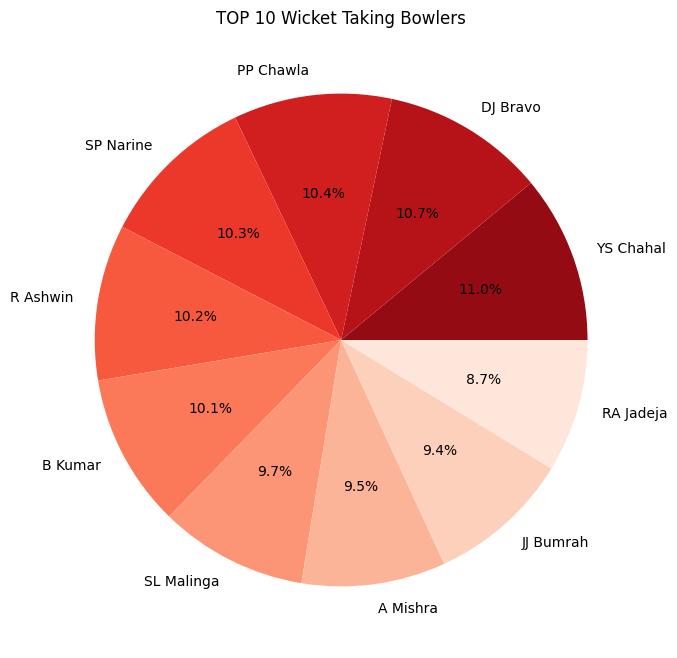

In [5]:
# Who are the Top Wicket-Taking Bowlers
most_wickets= df.groupby('bowler')['is_wicket'].sum().sort_values(ascending=False).head(10)
most_wickets=most_wickets.reset_index()
most_wickets.columns =['bowler','wickets']

# plot for most wickets
plt.figure(figsize=(8,8))
plt.pie(most_wickets['wickets'],labels=most_wickets['bowler'],autopct='%1.1f%%',colors=sns.color_palette('Reds_r',10))
plt.title('TOP 10 Wicket Taking Bowlers')
plt.show()



bowler
A Ashish Reddy     400
A Badoni            37
A Chandila         245
A Choudhary        144
A Dananjaya         47
                  ... 
Yash Dayal         933
Yash Thakur        702
Yudhvir Singh      125
Yuvraj Singh      1091
Z Khan            2860
Name: total_runs, Length: 530, dtype: int64


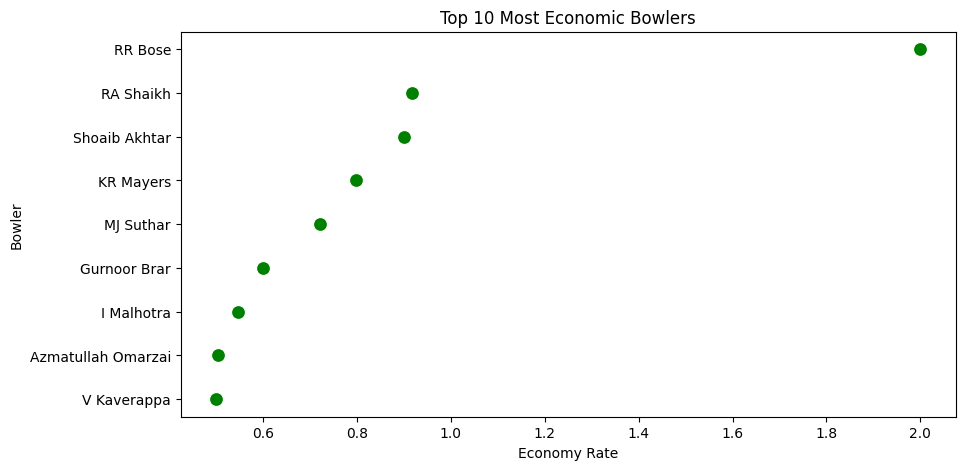

In [6]:
# Who are the most Economic Bowlers
overs =df.groupby('bowler')['over'].sum()

runs_hit = df.groupby('bowler')['total_runs'].sum()
print(runs_hit)

bowler_economy = runs_hit/overs


top_economy = bowler_economy.sort_values(ascending=False).head(10)
top_economy=top_economy.reset_index()
top_economy.columns =['bowler','economy']
top_economy=top_economy.drop(index=0)

# Plot for Most Economic Bowlers
plt.figure(figsize=(10,5))
sns.scatterplot(x='economy',y='bowler',data=top_economy,color ='green',s=100)
plt.xlabel('Economy Rate')
plt.ylabel('Bowler')
plt.title('Top 10 Most Economic Bowlers')
plt.show()



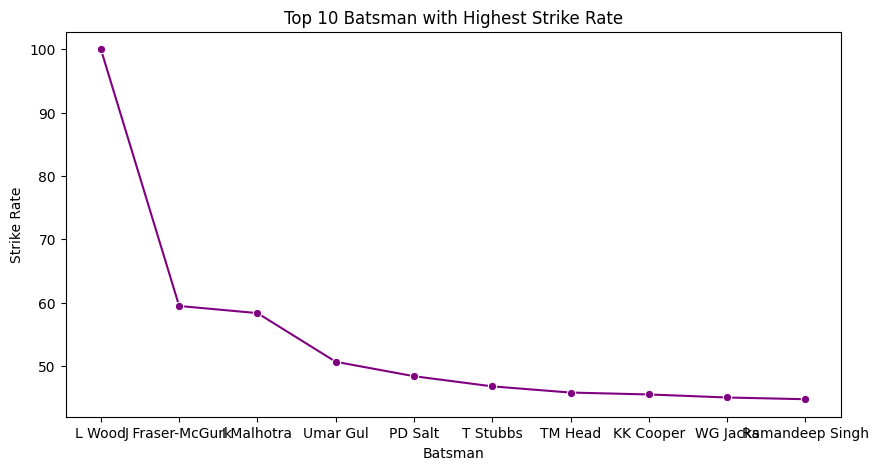

In [7]:
# Who are the Top 10 batsman with Highest Strike Rates
balls_faced = df.groupby('batter')['ball'].sum().sort_values(ascending=True)
runs_scored= df.groupby('batter')['batsman_runs'].sum().sort_values(ascending=False)

strike_rate = (runs_scored/balls_faced) * 100
highest_strike_rate =strike_rate.sort_values(ascending=False).head(10)
highest_strike_rate = highest_strike_rate.reset_index()
highest_strike_rate.columns =['batter','strike_rate']

# Plot for Batsman with Most Strike Rate
plt.figure(figsize=(10,5))
sns.lineplot(x='batter',y='strike_rate',data=highest_strike_rate,marker='o',color ='purple')
plt.xlabel("Batsman")
plt.ylabel('Strike Rate')
plt.title('Top 10 Batsman with Highest Strike Rate')
plt.show()


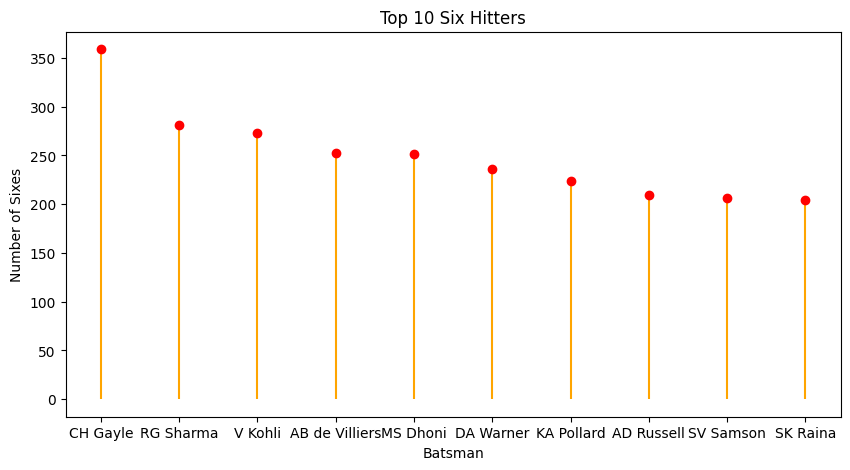

In [8]:
# Who are the Top 10 Six Hitters

sixes_df = df[df['batsman_runs']==6]
six_counts =sixes_df['batter'].value_counts().reset_index()
six_counts.columns =['batter','sixes']
top_six_hitters = six_counts.head(10)
top_six_hitters.columns =['batter','sixes']

# Plot for Top Six Hitters
plt.figure(figsize=(10,5))
plt.stem(top_six_hitters['batter'],top_six_hitters['sixes'],linefmt='orange',markerfmt='ro',basefmt=' ')
plt.xlabel("Batsman")
plt.ylabel('Number of Sixes')
plt.title('Top 10 Six Hitters')
plt.show()
